In [16]:
library(clustree, quietly = TRUE, warn.conflicts = FALSE)

In [2]:
install.packages("clustree")

also installing the dependencies ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘ggforce’, ‘graphlayouts’, ‘ggraph’, ‘igraph’, ‘tidygraph’, ‘ggrepel’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [9]:
directory = "/home/jovyan/work/phd/datasets/unbalanced"

In [21]:
dfr <-read.csv(file=paste(directory,"/topsbm/topsbm_labels.csv", sep=''), header=TRUE)

In [22]:
a0<-dfr['l0']-1
a1<-dfr['l1']-1
a2<-dfr['l2']-1
#a3<-dfr['l3']-1
tissues<-dfr['tissue']
subtissues<-dfr['subtissue']

In [37]:
df.fil<-data.frame("l1"=a1,"l0"=a0, "tissue"=tissues, "subtissue"=subtissues)

In [38]:
label_tissue <- function(tissues) {
    if (length(unique(tissues)) == 1) {
        tissues <- as.character(unique(tissues))
    } else {
        tissues <- names(sort(table(tissues),decreasing=TRUE)[1])[1]
    }
    return(tissues)
}

label_subtissue <- function(subtissues) {
    if (length(unique(subtissues)) == 1) {
        tissues <- as.character(unique(subtissues))
    } else {
        tissues <- names(sort(table(subtissues),decreasing=TRUE)[1])[1]
    }
    return(subtissues)
}

In [39]:
#https://www.rdocumentation.org/packages/clustree/versions/0.3.0/topics/clustree
p = clustree(df.fil, 
             node_colour = "tissue", 
             node_colour_aggr = "label_tissue",
             prefix = "l", 
             layout = "sugiyama", 
             edge_arrow=FALSE,
             use_core_edges=FALSE,
             scale_node_text=FALSE,
             node_label_size=2,
             node_alpha=0.8,
             return='plot')+
    guides(edge_alpha = FALSE, node_colour=FALSE, node_label=FALSE) +
    theme(legend.position = "right")

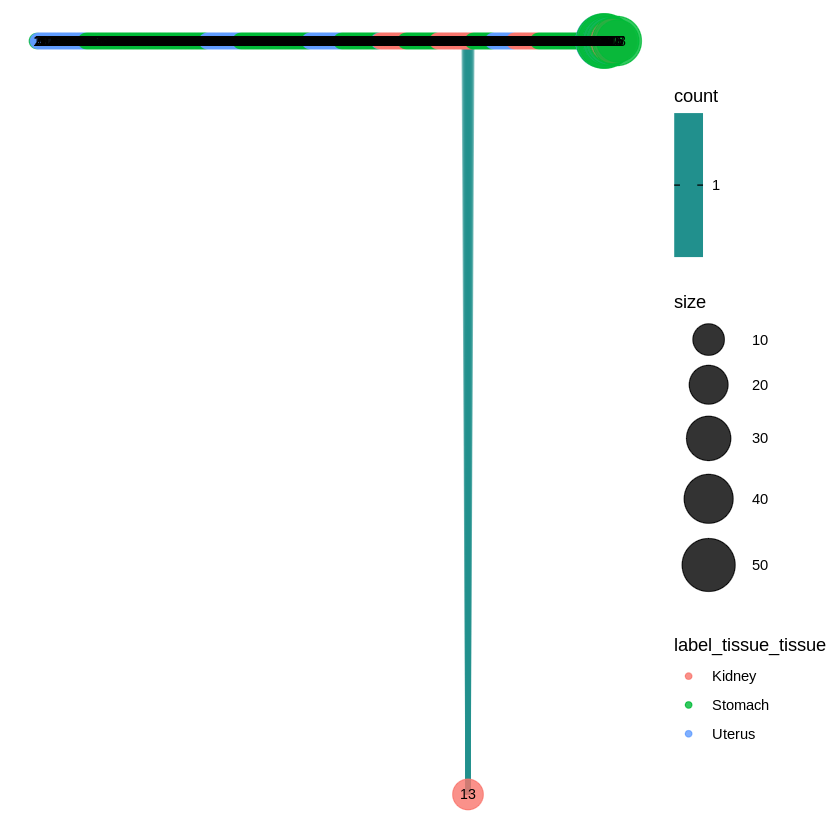

In [40]:
p

In [ ]:
ggsave(paste(directory,"/bipartite_rebuild.png", sep=''), p)

In [ ]:
help(clustree)